In [ ]:
%matplotlib inline


# A demo of the mean-shift clustering algorithm


Reference:

Dorin Comaniciu and Peter Meer, "Mean Shift: A robust approach toward
feature space analysis". IEEE Transactions on Pattern Analysis and
Machine Intelligence. 2002. pp. 603-619.




In [15]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


In [16]:
X

array([[ 1.42960758, -0.63959004],
       [ 0.19013867, -0.2620483 ],
       [-1.36314708,  0.11514953],
       ..., 
       [ 0.34547429, -1.22689466],
       [-0.39515174,  0.12965871],
       [-0.03412724,  0.39969579]])

In [10]:
cluster_centers

array([[ 0.91041204, -0.96198357],
       [ 0.99286534,  0.89948095],
       [-0.93968551, -1.00480179]])

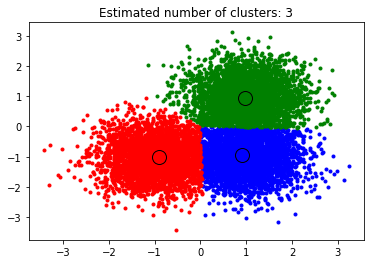

In [14]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()